In [69]:
import numpy as np
import pandas as pd
import os,sys,warnings
if not sys.warnoptions:    
    warnings.simplefilter('ignore')

df = pd.read_csv('./Source/data.csv')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [70]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [71]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

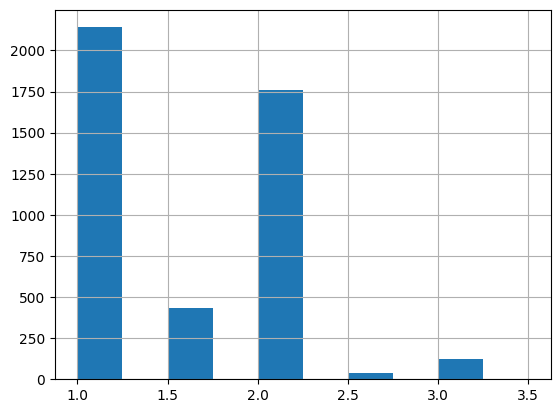

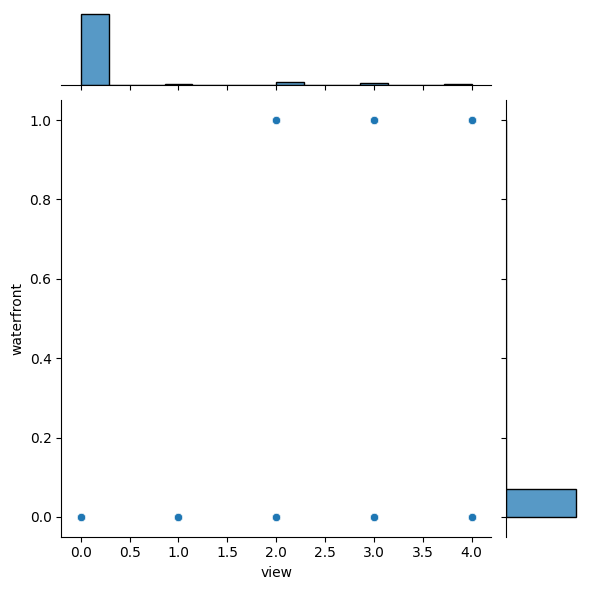

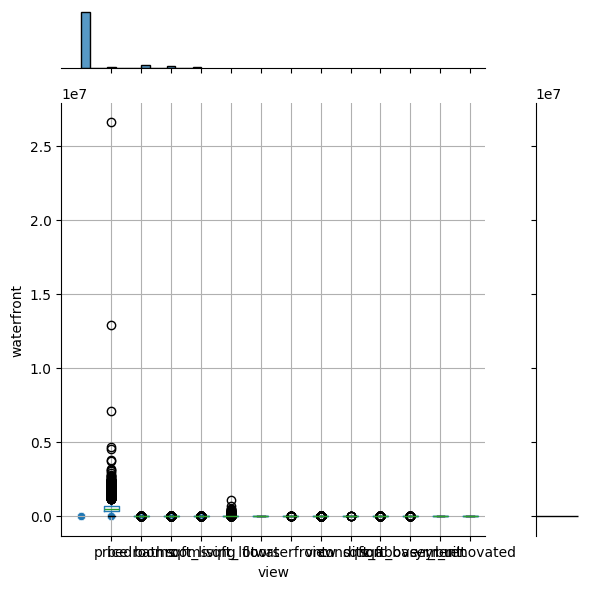

In [36]:
import matplotlib.pyplot as plt
df.boxplot(figsize=(10, 6))
plt.tight_layout()
plt.show()

In [72]:
df = df[df['price'] <= 5000000]

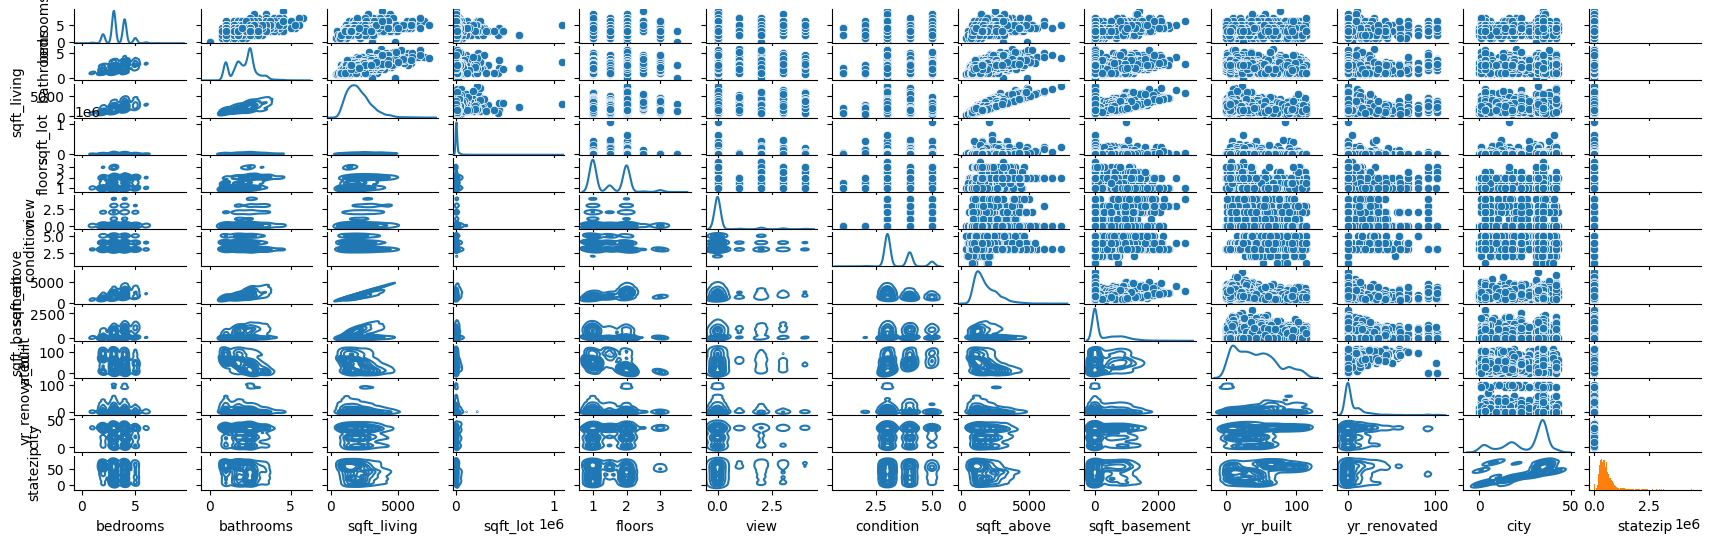

In [73]:
df['price'].hist(bins=150, figsize=(17, 5))
plt.tight_layout()
plt.show()

In [74]:
df = df[df['price'] <= 2000000]

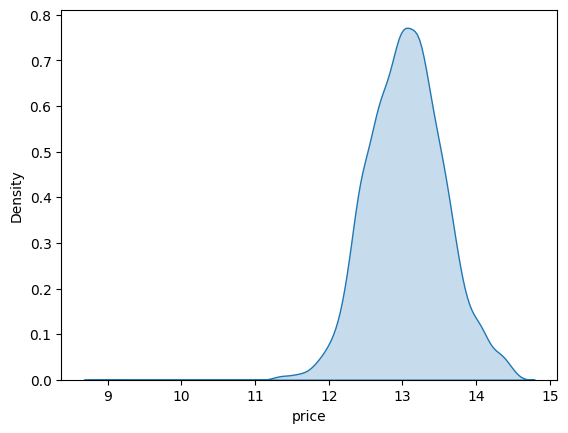

In [77]:
import seaborn as sns
sns.kdeplot(df['price'].apply(np.log1p), fill=True)
plt.show()

In [75]:
zero_price_records = df[df['price'] == 0.0]
print(zero_price_records)

                     date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
4354  2014-05-05 00:00:00    0.0       3.0       1.75         1490     10125   
4356  2014-05-05 00:00:00    0.0       4.0       2.75         2600      5390   
4357  2014-05-05 00:00:00    0.0       6.0       2.75         3200      9200   
4358  2014-05-06 00:00:00    0.0       5.0       3.50         3480     36615   
4361  2014-05-07 00:00:00    0.0       5.0       1.50         1500      7112   
4362  2014-05-07 00:00:00    0.0       4.0       4.00         3680     18804   
4374  2014-05-09 00:00:00    0.0       2.0       2.50         2200    188200   
4376  2014-05-09 00:00:00    0.0       4.0       2.25         2170     10500   
4382  2014-05-12 00:00:00    0.0       5.0       4.50         4630      6324   
4383  2014-05-13 00:00:00    0.0       5.0       4.00         4430      9000   
4385  2014-05-13 00:00:00    0.0       4.0       4.50         5030     11023   
4386  2014-05-13 00:00:00    0.0       4

In [76]:
df = df[df['price'] != 0]
df['price'].value_counts().sort_index()

price
7800.0       1
80000.0      1
83000.0      1
83300.0      2
84350.0      1
            ..
1950000.0    1
1965221.0    1
1970000.0    1
1990000.0    1
2000000.0    2
Name: count, Length: 1699, dtype: int64

In [78]:
df['date'] = pd.to_datetime(df['date'])

min_date = df['date'].min()
max_date = df['date'].max()
duration = max_date - min_date

print("Min Date:", min_date)
print("Max Date:", max_date)
print("Duration:", duration)

Min Date: 2014-05-02 00:00:00
Max Date: 2014-07-10 00:00:00
Duration: 69 days 00:00:00


In [79]:
unique_value_counts = df.nunique()
print(unique_value_counts)

date               70
price            1699
bedrooms           10
bathrooms          22
sqft_living       539
sqft_lot         3050
floors              6
waterfront          2
view                5
condition           5
sqft_above        492
sqft_basement     201
yr_built          115
yr_renovated       59
street           4430
city               44
statezip           77
country             1
dtype: int64


In [80]:
X = df.drop('price', axis=1)
X.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,2014-05-02,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA


In [81]:
y = df.price
y.describe()

count    4.504000e+03
mean     5.283729e+05
std      2.900594e+05
min      7.800000e+03
25%      3.250000e+05
50%      4.610000e+05
75%      6.500000e+05
max      2.000000e+06
Name: price, dtype: float64

In [82]:
X['country'].value_counts()

country
USA    4504
Name: count, dtype: int64

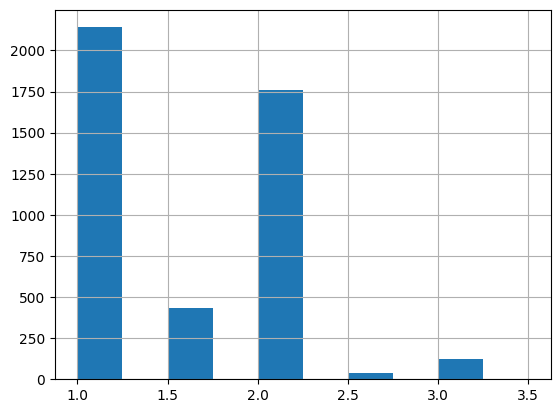

In [83]:
X['floors'].hist()
plt.show()

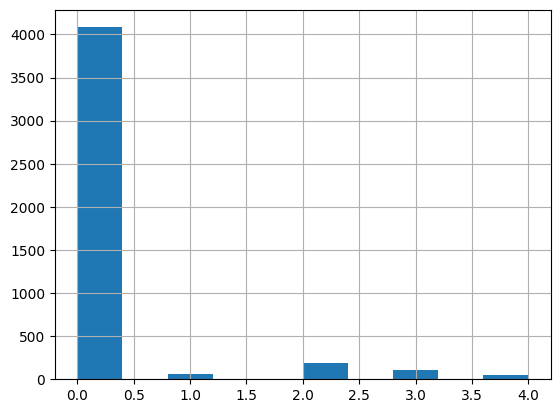

In [84]:
X['view'].hist()
plt.show()

In [85]:
X['view'].value_counts()

view
0    4083
2     194
3     109
1      66
4      52
Name: count, dtype: int64

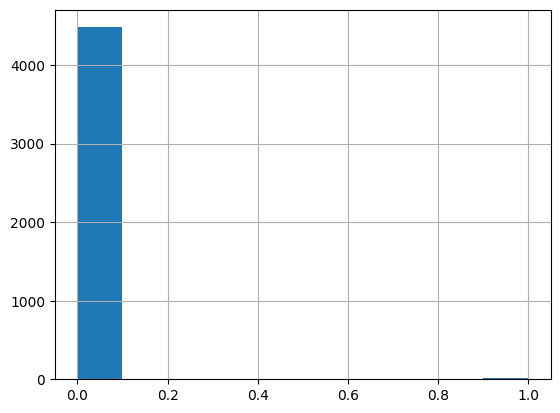

In [86]:

X['waterfront'].hist()
plt.show()

In [87]:
X['waterfront'].value_counts()

waterfront
0    4482
1      22
Name: count, dtype: int64

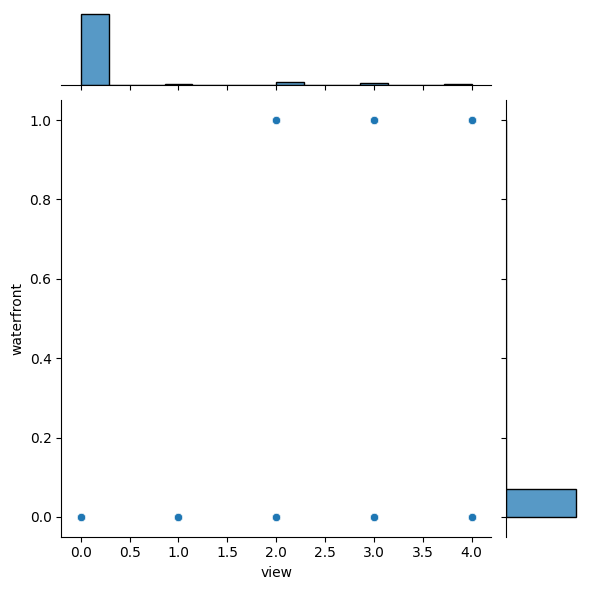

In [88]:
sns.jointplot(x='view', y='waterfront', data=df)
plt.show()

In [89]:
waterfront_by_view = X.groupby(['view', 'waterfront']).size().unstack(fill_value=0)
print(waterfront_by_view)

waterfront     0   1
view                
0           4083   0
1             66   0
2            191   3
3            105   4
4             37  15


In [90]:
X.drop(['country', 'date', 'waterfront', 'street'], axis=1, inplace=True)

In [91]:
df['yr_built'].value_counts().sort_index()

yr_built
1900    22
1901     9
1902    10
1903    10
1904     9
        ..
2010    27
2011    24
2012    33
2013    54
2014    77
Name: count, Length: 115, dtype: int64

In [92]:
X['yr_built'] = 2014 - X['yr_built']

In [93]:
X['yr_built'].value_counts().sort_index()

yr_built
0      77
1      54
2      33
3      24
4      27
       ..
110     9
111    10
112    10
113     9
114    22
Name: count, Length: 115, dtype: int64

In [94]:
mask = df['yr_renovated'] != 0
X.loc[mask, 'yr_renovated'] = 2014 - X.loc[mask, 'yr_renovated']

In [95]:
X['yr_renovated'].value_counts().sort_index()

yr_renovated
0      2748
1        61
2        45
3        54
4        30
5       106
6        45
7         6
8        66
9        93
10       77
11      148
12       39
13      104
14      168
15       39
16       39
17       28
18       20
19        2
20       56
21       38
22       32
23        1
24       16
25       54
26       42
27        1
28        5
29       29
30        9
31       40
32       22
33        1
34        2
35       30
36        3
37        1
40        6
42       17
43        5
44        9
45       11
46        9
48        1
51       12
54        1
56        5
58       15
59        2
60        8
61        1
66        1
69        7
80        6
91       54
101       1
102      33
Name: count, dtype: int64

In [96]:
from sklearn.preprocessing import LabelEncoder
def label_encoder(d):
    LE = LabelEncoder()
    for c in d.columns:
        if d[c].dtypes==object:
            d[c] = LE.fit_transform(d[c])
    return d

In [97]:
X_enc = label_encoder(X)
X_enc.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,3.0,1.50,1340,7912,1.5,0,3,1340,0,59,9,36,62
2,3.0,2.00,1930,11947,1.0,0,4,1930,0,48,0,18,26
3,3.0,2.25,2000,8030,1.0,0,4,1000,1000,51,0,3,7
4,4.0,2.50,1940,10500,1.0,0,4,1140,800,38,22,31,31
5,2.0,1.00,880,6380,1.0,0,3,880,0,76,20,35,54


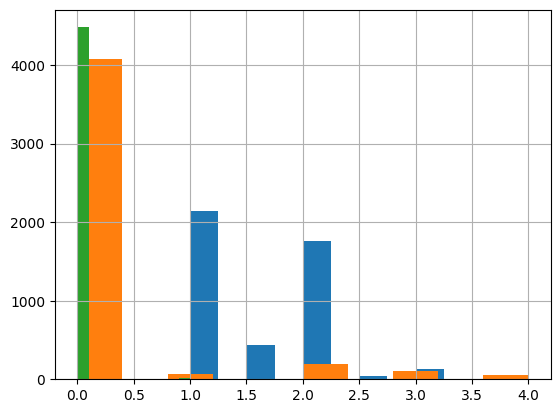

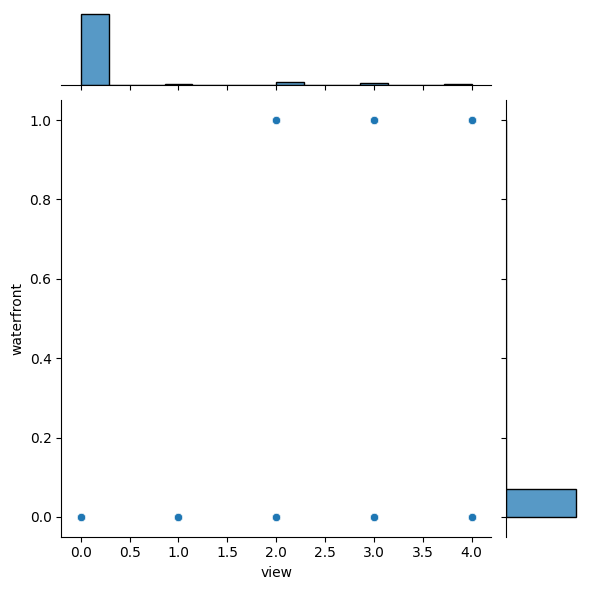

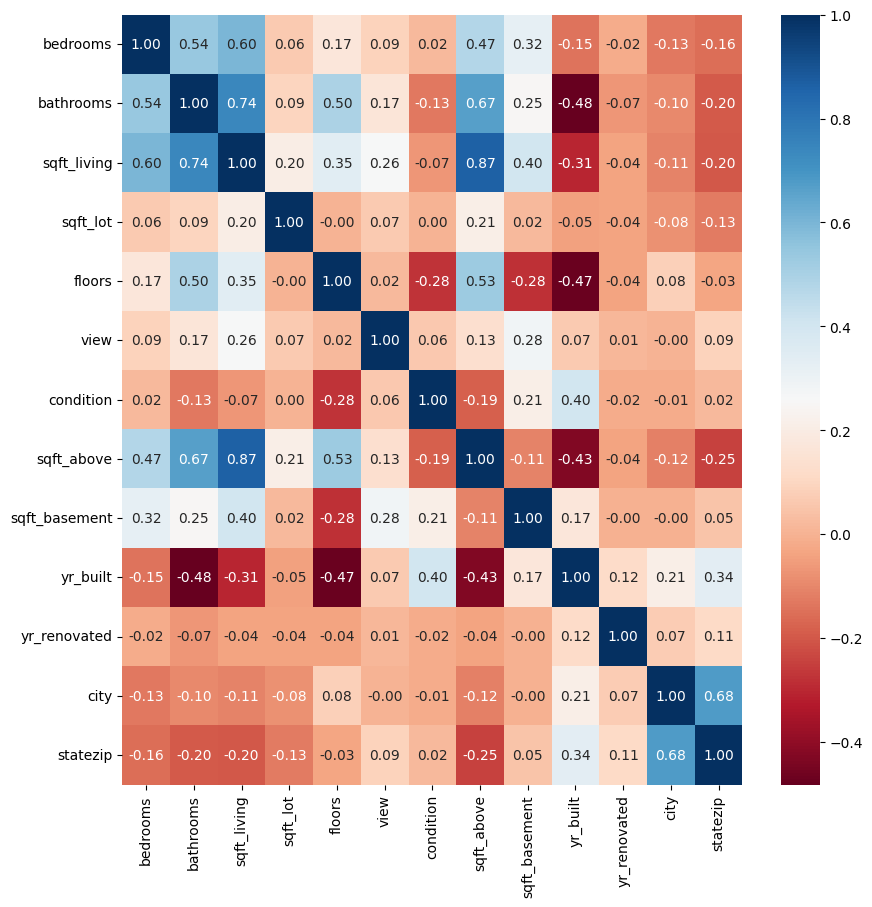

In [63]:
plt.figure(figsize=(10,10))
cor = X_enc.corr()
sns.heatmap(cor, annot=True, cmap="RdBu", fmt=".2f")
plt.yticks(rotation=0)
plt.show()

In [64]:
high_corr = cor[(cor > 0.75) & (cor !=1.0)]
high_corr = high_corr.stack().reset_index()
high_corr.columns = ['Variable 1', 'Variable 2', 'Correlation']
high_corr = high_corr.dropna()
high_corr 

,Variable 1,Variable 2,Correlation
0,sqft_living,sqft_above,0.866295
1,sqft_above,sqft_living,0.866295


In [65]:
g = sns.PairGrid(X, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)

In [66]:
X_enc.drop(['sqft_living'], axis=1, inplace=True)

<Figure size 500x400 with 0 Axes>

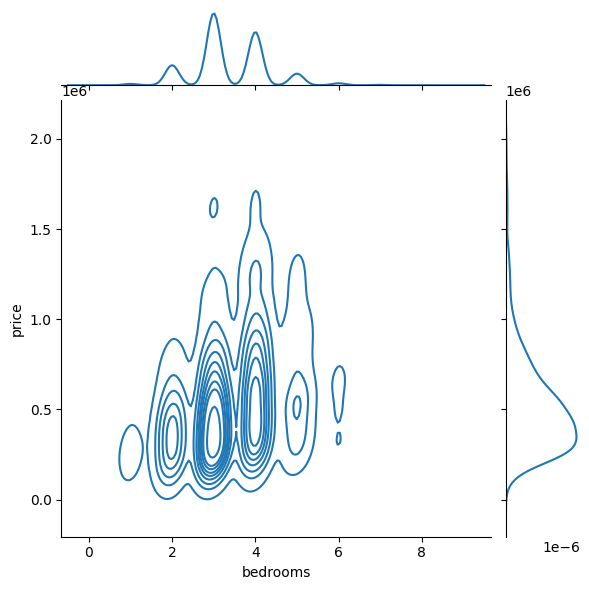

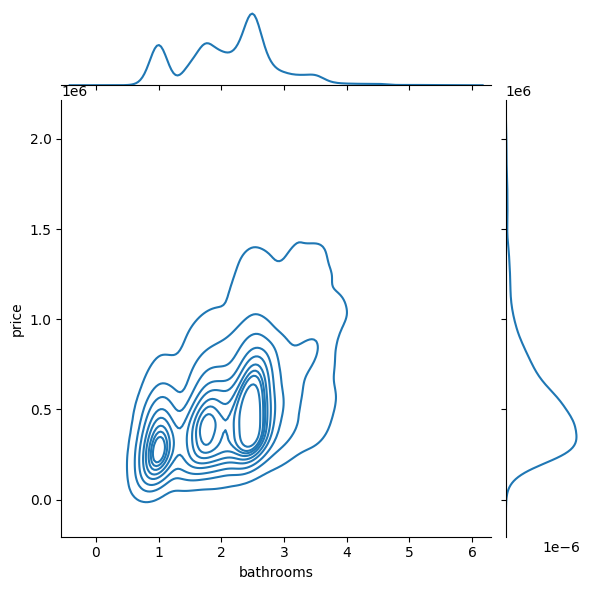

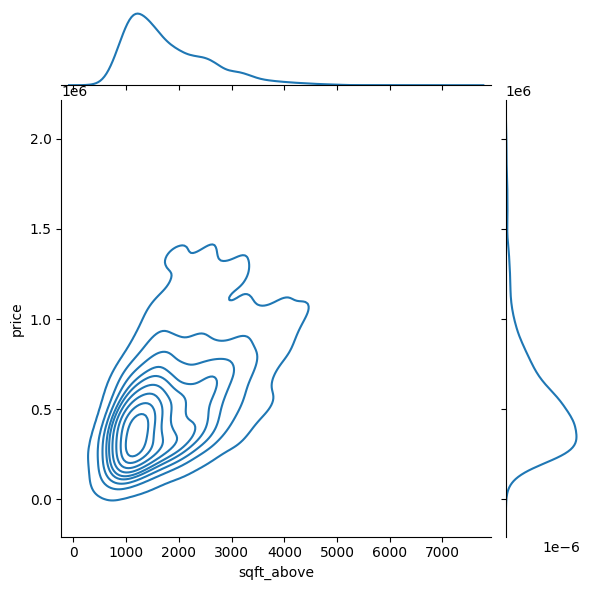

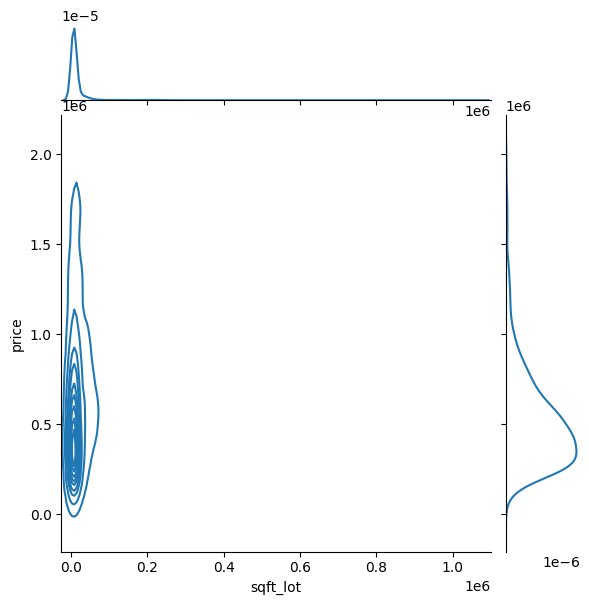

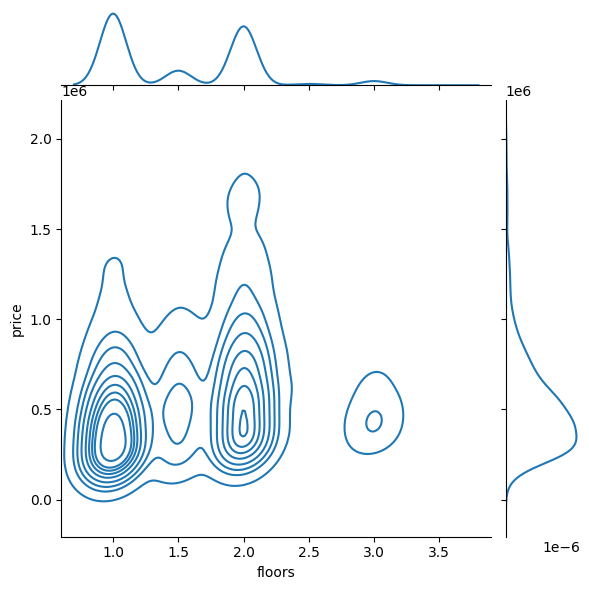

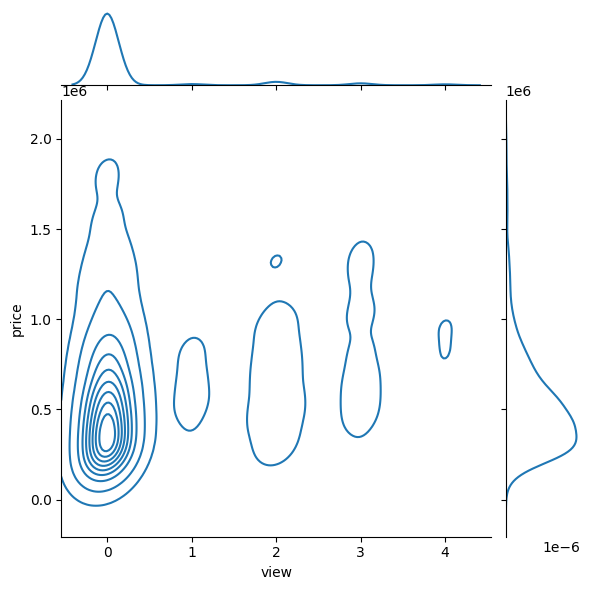

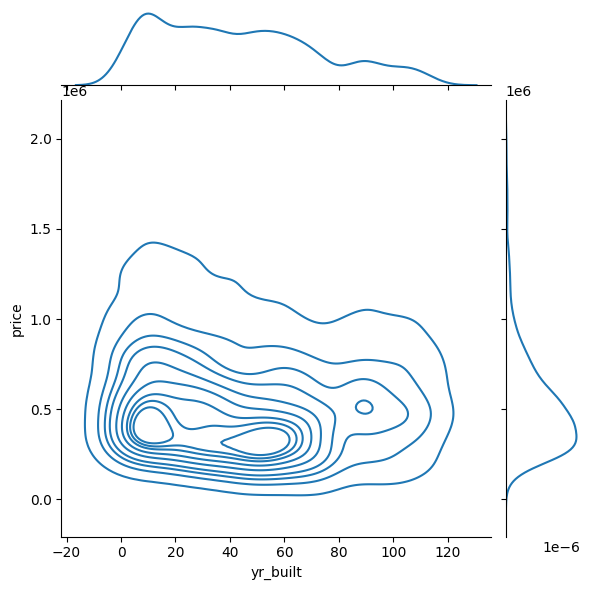

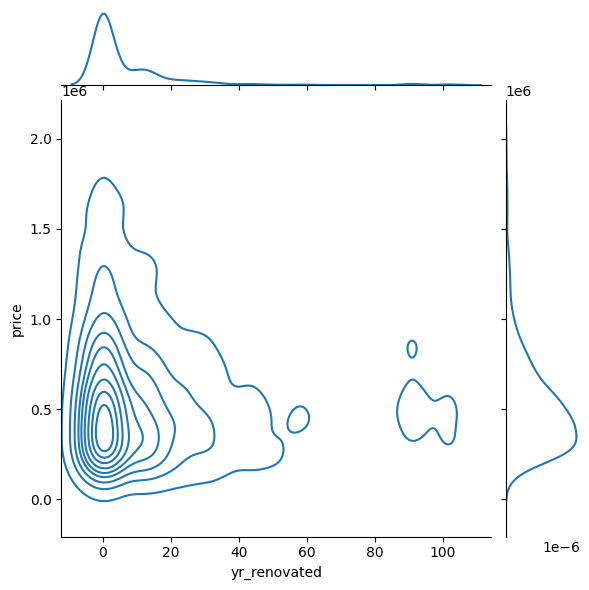

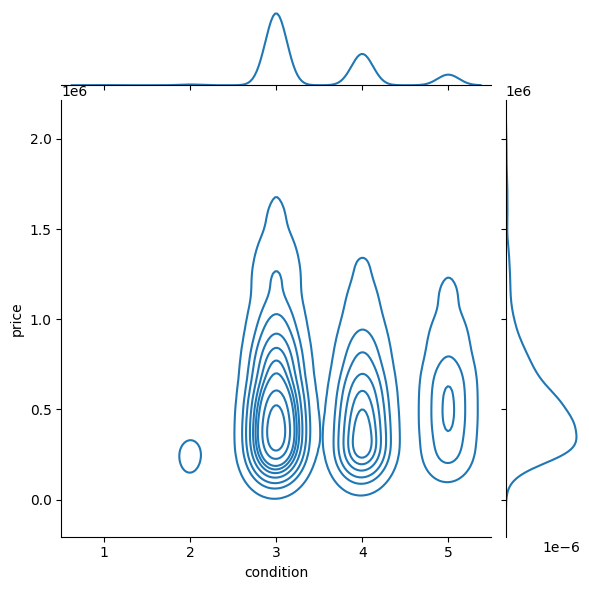

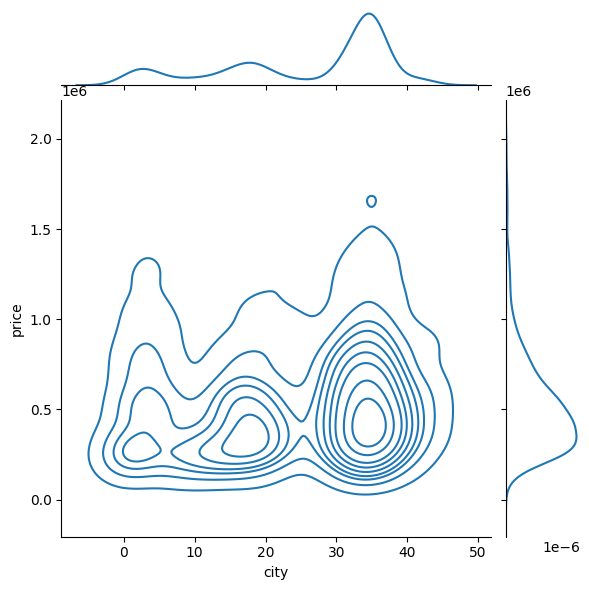

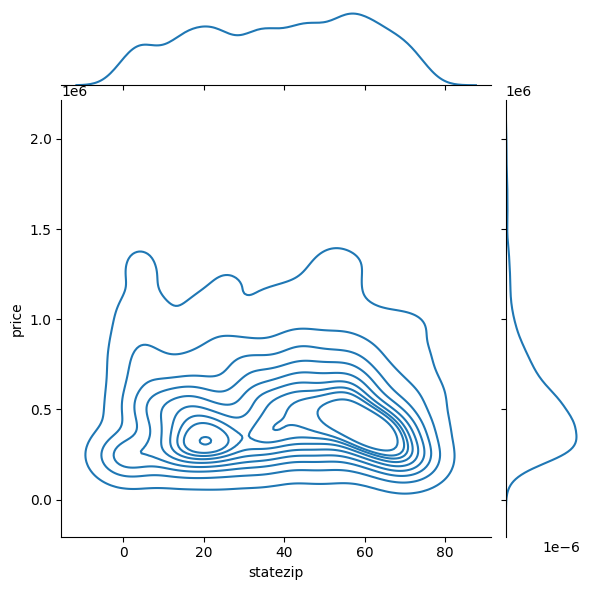

In [62]:
plt.figure(figsize=(5,4))
sns.jointplot(x=X["bedrooms"], y=y, kind="kde")
sns.jointplot(x=X["bathrooms"], y=y, kind="kde")
sns.jointplot(x=X["sqft_above"], y=y, kind="kde")
sns.jointplot(x=X["sqft_lot"], y=y, kind="kde")
sns.jointplot(x=X["floors"], y=y, kind="kde")
sns.jointplot(x=X["view"], y=y, kind="kde")
sns.jointplot(x=X["yr_built"], y=y, kind="kde")
sns.jointplot(x=X["yr_renovated"], y=y, kind="kde")
sns.jointplot(x=X["condition"], y=y, kind="kde")
sns.jointplot(x=X["city"], y=y, kind="kde")
sns.jointplot(x=X["statezip"], y=y, kind="kde")
plt.show()

In [67]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
XNorm = pd.DataFrame(MMS.fit_transform(X_enc), columns=X_enc.columns)

In [64]:
XNorm.shape

(4504, 12)

In [65]:
from scipy.stats import loguniform
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor

In [26]:
model = MLPRegressor(max_iter=5000, random_state=2020, solver='adam')

cv = KFold(n_splits=10, shuffle=True, random_state=1)

space = dict()
space['alpha'] = loguniform(1e-5, 100)  
space['learning_rate'] = ['constant', 'invscaling', 'adaptive']
space['hidden_layer_sizes'] = [(10, 12), (15, 20), (20, 30)]

RS = RandomizedSearchCV(model, space, n_iter=200, n_jobs=-1, scoring='neg_mean_squared_error', cv=cv, random_state=1)

RS.fit(XNorm, y)

/home/serveradmin2/DataScience/HousePricePrediction/venv/lib64/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/serveradmin2/DataScience/HousePricePrediction/venv/lib64/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/serveradmin2/DataScience/HousePricePrediction/venv/lib64/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/serveradmin2/DataScience/HousePricePrediction/venv/lib64/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stoc

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
                   estimator=MLPRegressor(max_iter=5000, random_state=2020),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fb3627d0150>,
                                        'hidden_layer_sizes': [(10, 12),
                                                               (15, 20),
                                                               (20, 30)],
                                        'learning_rate': ['constant',
                                                          'invscaling',
                                                          'adaptive']},
                   random_state=1, scoring='neg_mean_squared_error')

In [27]:
print(RS.best_score_)
print(RS.best_params_)

-250621045705.326
{'alpha': 21.764376542113336, 'hidden_layer_sizes': (20, 30), 'learning_rate': 'constant'}


In [28]:
from sklearn.model_selection import KFold, RandomizedSearchCV
from xgboost import XGBRegressor
from scipy.stats import loguniform

model = XGBRegressor(random_state=2020)

cv = KFold(n_splits=10, shuffle=True, random_state=1)

space = dict()
space['alpha'] = loguniform(1e-5, 100)  
space['learning_rate'] = [0.01, 0.1, 0.3, 0.5]
space['max_depth'] = [5, 7, 9]
space['n_estimators'] = [100, 200, 300, 400]
space['gamma'] = [0, 0.1, 0.3, 0.5]
space['subsample'] = [0.5, 0.7, 0.9, 1.0]
space['colsample_bytree'] = [0.5, 0.7, 0.9, 1.0]

RS = RandomizedSearchCV(model, space, n_iter=200, n_jobs=-1, scoring='neg_mean_squared_error', cv=cv, random_state=1)

RS.fit(XNorm, y)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=Non...
                                          random_state=2020, ...),
                   n_iter=200,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fb377712750>,
                                        'colsample_bytree': [0.5, 0.7, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.3, 0.5],
                                        'learning_rate': [0.01, 0.1, 0.3, 0.5],
                                        'max_depth': [5, 7, 9],
                                        'n_estimators': [100, 200, 300, 400],
                                        'subsample': [0.5, 0.7, 0.9, 1.0]},
                   random_state=1, scoring='neg_mean_squared_error')

In [29]:
print(RS.best_score_)
print(RS.best_params_)

-246351546571.37396
{'alpha': 0.010028626936762168, 'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 400, 'subsample': 0.5}


In [71]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.model_selection import KFold
from xgboost import XGBRegressor

# Define pipeline with StandardScaler and XGBRegressor
pipeline = make_pipeline(StandardScaler(), XGBRegressor(random_state=2020))

cv = KFold(n_splits=10, shuffle=True, random_state=1)

space = dict()
space['xgbregressor__alpha'] = loguniform(1e-5, 100)  
space['xgbregressor__learning_rate'] = [0.01, 0.1, 0.3, 0.5]
space['xgbregressor__max_depth'] = [9, 11, 15]
space['xgbregressor__n_estimators'] = [400, 700, 900]
space['xgbregressor__gamma'] = [0, 0.15, 0.25, 0.45]
space['xgbregressor__subsample'] = [0.6, 0.8, 0.9]
space['xgbregressor__colsample_bytree'] = [0.4, 0.6, 0.8, 1.0]

RS = RandomizedSearchCV(pipeline, space, n_iter=200, n_jobs=-1, scoring='neg_mean_squared_error', cv=cv, random_state=1)

RS.fit(XNorm, y)

print(RS.best_score_)
print(RS.best_params_)


-19805633290.40709
{'xgbregressor__alpha': 0.00760027932694573, 'xgbregressor__colsample_bytree': 0.4, 'xgbregressor__gamma': 0.45, 'xgbregressor__learning_rate': 0.01, 'xgbregressor__max_depth': 9, 'xgbregressor__n_estimators': 900, 'xgbregressor__subsample': 0.9}


In [73]:
model = MLPRegressor(max_iter=5000, random_state=2020, solver='adam')

cv = KFold(n_splits=10, shuffle=True, random_state=1)

space = dict()
space['alpha'] = loguniform(1e-5, 100)  
space['learning_rate'] = ['constant', 'invscaling', 'adaptive']
space['hidden_layer_sizes'] = [(30, 40), (30, 50), (43, 52), (55, 70), (60, 60)]

RS = RandomizedSearchCV(model, space, n_iter=300, n_jobs=-1, scoring='neg_mean_squared_error', cv=cv, random_state=1)

RS.fit(XNorm, y)


print(RS.best_score_)
print(RS.best_params_)


/home/serveradmin2/DataScience/HousePricePrediction/venv/lib64/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/serveradmin2/DataScience/HousePricePrediction/venv/lib64/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/serveradmin2/DataScience/HousePricePrediction/venv/lib64/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/serveradmin2/DataScience/HousePricePrediction/venv/lib64/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stoc

-36657485000.39235
{'alpha': 6.3375391597940345, 'hidden_layer_sizes': (55, 70), 'learning_rate': 'constant'}


In [68]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
model = MLPRegressor(hidden_layer_sizes= (20, 30), solver='adam', max_iter=5000, random_state=2020, alpha= 21.764376542113336, learning_rate= 'constant')

pred = cross_val_predict(model, XNorm, y, cv=5)
np.sqrt(mean_squared_error(y, pred))

196094.8454298496